In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

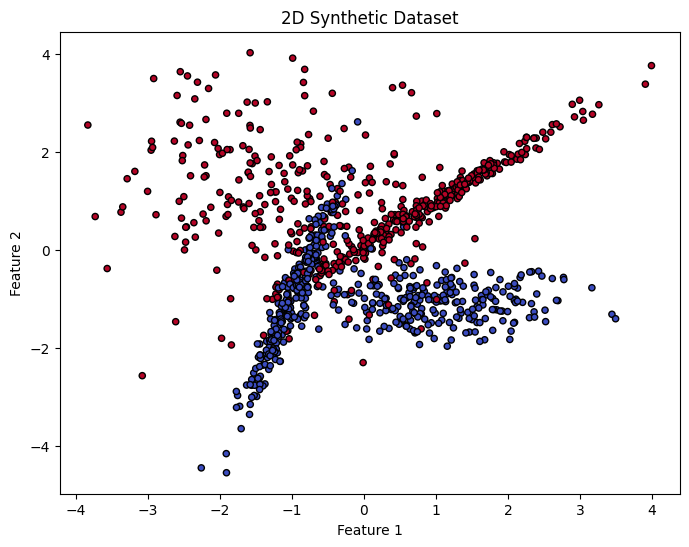

In [37]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title("2D Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [48]:
import xgboost as xgb

# Define the model
n_estimators = 10
model = xgb.XGBClassifier(n_estimators=n_estimators, use_label_encoder=False, eval_metric='logloss')


# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, predictions))

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       148
           1       0.97      0.89      0.93       152

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



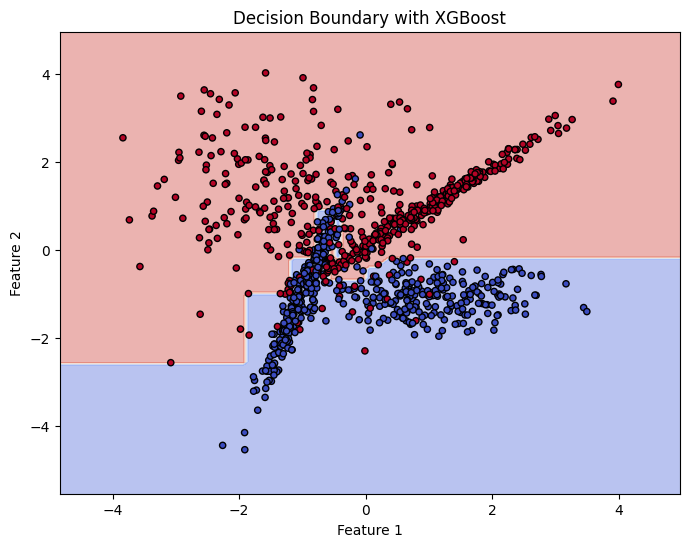

In [50]:
import numpy as np

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classes for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title("Decision Boundary with XGBoost")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Define the transition matrix
transition_matrix = np.array([[0.7, 0.3],
                              [0.5, 0.5]])

# Define the state space
states = ['Sunny', 'Rainy']

# Initial state
current_state = 0  # Let's assume the initial state is Sunny (0)

In [6]:
# Function to simulate weather for a given number of days
def simulate_weather(days):
    global current_state
    weather_sequence = [states[current_state]]
    
    for _ in range(days - 1):
        current_state = np.random.choice([0, 1], p=transition_matrix[current_state])
        weather_sequence.append(states[current_state])
    
    return weather_sequence

In [7]:
# Simulate weather for 10 days
print(simulate_weather(10))

['Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy']


Step 1: Define the Model Components
Hidden States: The weather conditions, which can be either 'Sunny' or 'Rainy'.
Observable States (Emissions): The observation of whether a person carries an umbrella or not, which can be 'Umbrella' or 'No Umbrella'.
Transition Probabilities: The likelihood of transitioning from one weather condition to another.
Emission Probabilities: The likelihood of observing each possible observation given each weather condition.
Initial State Probabilities: The initial likelihood of the weather being sunny or rainy.
Let's assume the following probabilities:

Transition Probabilities:

P(Sunny | Sunny) = 0.8
P(Rainy | Sunny) = 0.2
P(Sunny | Rainy) = 0.4
P(Rainy | Rainy) = 0.6
Emission Probabilities:

P(Umbrella | Sunny) = 0.1
P(No Umbrella | Sunny) = 0.9
P(Umbrella | Rainy) = 0.8
P(No Umbrella | Rainy) = 0.2
Initial State Probabilities:

P(Sunny) = 0.5
P(Rainy) = 0.5

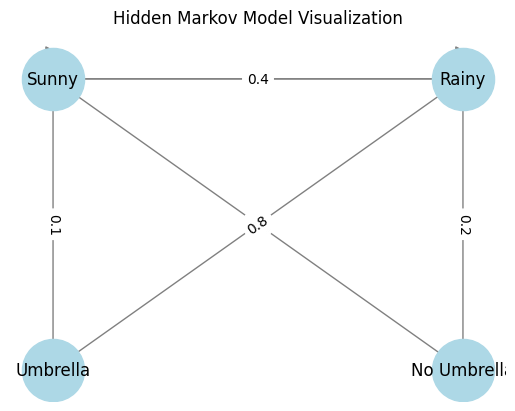

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with the node attribute "bipartite"
G.add_nodes_from(["Sunny", "Rainy"], bipartite=0)  # Add the weather states
G.add_nodes_from(["Umbrella", "No Umbrella"], bipartite=1)  # Add the observations

# Add edges between states and also from states to observations
G.add_edges_from([("Sunny", "Sunny", {"weight": 0.8}), ("Sunny", "Rainy", {"weight": 0.2}),
                  ("Rainy", "Sunny", {"weight": 0.4}), ("Rainy", "Rainy", {"weight": 0.6})])

G.add_edges_from([("Sunny", "Umbrella", {"weight": 0.1}), ("Sunny", "No Umbrella", {"weight": 0.9}),
                  ("Rainy", "Umbrella", {"weight": 0.8}), ("Rainy", "No Umbrella", {"weight": 0.2})])

pos = {"Sunny": (0, 1), "Rainy": (1, 1),  # Positions of the weather states
       "Umbrella": (0, 0), "No Umbrella": (1, 0)}  # Positions of the observations

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")

# Draw the labels
nx.draw_networkx_labels(G, pos)

# Draw the edges
nx.draw_networkx_edges(G, pos, edge_color="gray")

# Draw edge labels
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Hidden Markov Model Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

In [20]:
from hmmlearn.hmm import CategoricalHMM
import numpy as np

# Number of states
n_states = 2

# Number of observation symbols
n_observations = 2

# Transition probability matrix
transition_probability = np.array([
    [0.8, 0.2],  # Sunny to Sunny, Sunny to Rainy
    [0.4, 0.6]   # Rainy to Sunny, Rainy to Rainy
])

# Emission probability matrix
emission_probability = np.array([
    [0.9, 0.1],  # Sunny -> No Umbrella, Sunny -> Umbrella
    [0.2, 0.8]   # Rainy -> No Umbrella, Rainy -> Umbrella
])

# Initial state probability distribution
initial_probability = np.array([0.5, 0.5])

# Create HMM
model = CategoricalHMM(n_components=n_states)
model.startprob_ = initial_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [21]:
# Observation sequence (0 = No Umbrella, 1 = Umbrella)
observations = np.array([[1, 0, 1, 1, 0]]).T

# Decode the observations to get the most likely sequence of states
logprob, states = model.decode(observations, algorithm="viterbi")

# Map the numeric states to weather conditions
weather_states = ['Sunny', 'Rainy']
predicted_weather_sequence = [weather_states[state] for state in states]

# Print the observation sequence and the predicted weather sequence
observation_sequence = ['Umbrella' if obs[0] == 1 else 'No Umbrella' for obs in observations]
print("Observations:", observation_sequence)
print("Predicted Weather States:", predicted_weather_sequence)

Observations: ['Umbrella', 'No Umbrella', 'Umbrella', 'Umbrella', 'No Umbrella']
Predicted Weather States: ['Rainy', 'Rainy', 'Rainy', 'Rainy', 'Sunny']
